# Laboratorio 1: Exploración de Datos.

### Implementación:

#### Se deberá presentar al menos la siguiente información:
1. Estadísticas descriptivas:
    * Calcular estadísticos como la moda, media, mediana y desviación estándar del peso y de la edad. ¿Responden a alguna distribución conocida?
    * Realizar un análisis de outliers.
    * Explicar cómo varían las métricas cuando desglosamos por género. ¿Responden a alguna distribución conocida? Comparar cualitativamente y gráficamente ambas distribuciones. Calcular la correlación entre todas estas variables y mostrarla con un gráfico conjunto.
2. Calcular la probabilidad marginal y conjunta, y la correlación entre otras dos variables, por ejemplo consumo de alcohol y tabaquismo.
    * Representar visualmente la probabilidad conjunta entre los valores posibles de las variables elegidas.
3. Responda a la siguientes preguntas: ¿Qué pasaría con los niveles de tabaquismo si se prohíbe fumar en los bares? ¿Qué pasaría con la cantidad de consumidores de alcohol si disminuye la cantidad de fumadores que consumen alcohol?

#### Se evaluarán los siguientes aspectos:
1. Estructura legible de la notebook.
2. Los tipos de gráficos son adecuados para la información representada.




****
#### En primer lugar, importamos las librerías con las que vamos a trabajar: pandas, matplotlib, seaborn, etc.

In [4]:
%matplotlib inline
import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns',150)
plt.style.use('bmh')
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

#### Seguidamente, necesitamos leer el dataset, el cual, en este caso fue sacado de la página de Kaggle "We are from our childhood":

In [5]:
young = pd.read_csv('responses.csv')

#### Para corroborar que hayamos leído correctamente el dataset y no surja ningún error más adelante, procedemos a mostrar una pequeña porción del mismo:

In [6]:
young.head(5) #Mostramos 5 primeras filas del dataset 

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0

#### Si observamos la tabla anterior podemos hacernos una idea del contenido del dataset, el cual consta de diferentes categorías como por ejemplo: música, arte, religión, edad, etc. A su vez, las respuestas de la gran mayoría de las categorías están representadas en una escala numérica del 1 al 5, donde 1 significa "No lo disfruto para nada" y 5 significa "Lo disfruto mucho". El resto de las categorías tienen respuestas del tipo "string".

*****
## Punto 1: 
#### Como ya tenemos las librerías importadas y el dataset cargado, vamos a proceder a mostrar las estadísticas básicas del dataset, para ello utilizamos la función describe() que provee pandas, la cual nos permite mostrar la cuenta, la media, la deviación estándar, el valor mínimo, el primer cuartil, el segundo cuartil ó mediana, el tercer cuartil y el valor máximo, de cada una de las columnas (ó categorías) del dataset:

In [7]:
young.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,1002.000000,1006.000000,1003.000000,1004.000000,1003.000000,1003.000000,1002.000000,1003.000000,1009.000000,1004.000000,1008.000000,1009.000000,1007.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1002.000000,1006.000000,1008.000000,1008.000000,1005.000000,1009.000000,1007.000000,1007.000000,1006.000000,1004.000000,1005.000000,1004.000000,1000.000000,1004.000000,1001.000000,1005.000000,1005.000000,1009.000000,1006.000000,1004.000000,1007.000000,1003.000000,1007.000000,1009.000000,1004.000000,995.000000,1006.000000,1003.000000,1008.000000,1008.000000,1004.000000,1002.000000,1006.000000,1007.000000,1006.00000,1007.000000,1009.000000,1008.000000,1007.000000,1005.000000,1010.000000,1007.000000,1009.000000,1009.000000,1009.000000,1007.000000,1003.000000,1005.000000,1007.000000,1005.000000,1007.000000,1003.000000,1006.000000,1009.000000,1006.000000,1004.000000,1006.000000,1009.000000,1003.000000,1006.000000,1007.000000,1005.000000,1006.000000,1006.000000,1005.000000,1010.000000,1004.000000,1003.000000,1008.000000,1009.000000,1006.000000,1009.000000,1008.000000,1008.000000,1010.000000,1007.000000,1010.000000,1007.000000,1008.000000,1006.000000,1007.000000,1005.000000,1008.000000,1004.000000,1006.000000,1008.000000,1006.000000,1008.000000,1008.000000,1007.000000,1007.000000,1006.000000,1005.000000,1006.000000,1006.000000,1006.000000,1005.000000,1007.000000,1008.000000,1006.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,2.456088,2.910537,2.769691,2.759960,3.141575,2.828514,2.842315,2.338983,2.139742,4.613546,2.793651,3.383548,4.494538,3.489573,3.113095,3.155754,3.749752,3.788481,3.643713,2.126243,3.536706,3.207341,3.138308,2.595639,2.334657,2.064548,4.175944,3.136454,2.643781,2.665339,2.165000,3.159363,3.082917,3.778109,2.516418,2.256690,2.686879,2.589641,2.273088,3.686939,2.461768,2.324083,1.901394,3.387940,3.291252,1.907278,2.362103,3.276786,3.234064,3.024950,4.557654,2.948361,3.33499,2.061569

#### Aquellas categorías cuyas respuestas no son numéricas (por ejemplo, tipo string), no se les calcula las estadísticas básicas, ya que la función describe() sólo funciona para aquellas columnas del tipo int o float.
#### Por otra parte, con un rápido vistazo podemos ver que a la mayoría de las personas les gusta la Música, ya que el valor medio de dicha categoría es de $\mu=4.7$
****

#### Si bien en la tabla anterior se muestran los estadísticos básicos de cada una de las categorías (sólo int y/ó float), la consigna pide segmentar por edad y peso. Para ello, en lugar de la función describe(), utilizamos otras funciones como mean(), std(), etc y segmentamos por edad y peso; ó lo que es lo mismo decir, nos quedamos con las columnas de edad y peso.

#### A continuación tabulamos los valores de la moda, media, mediana y desviación estándar según el peso y la edad. Además, aprovechamos para mostrar también la varianza, el valor máximo, mínimo, la suma de los valores y la cuenta de los mismos:

In [8]:
edad = young.Age.dropna()
peso = young.Weight.dropna()

estadisticos = pd.DataFrame({'Edad':[edad.mode()[0],edad.mean(),
                                     edad.median(), edad.std(),
                                     edad.min(),    edad.max(),
                                     edad.var(),    edad.sum(),
                                     edad.count()],
                             'Peso':[peso.mode()[0], peso.mean(),
                                     peso.median(),  peso.std(),
                                     peso.min(),     peso.max(),
                                     peso.var(),     peso.sum(),
                                     peso.count()]},
                            index=['Moda','Media','Mediana','Desviación Estándar',
                                   'Valor Mínimo','Valor Máximo','Varianza',
                                   'Suma de Valores','Cuenta de Valores'])
display(estadisticos)

,Edad,Peso
Moda,19.000000,60.000000
Media,20.433699,66.405051
Mediana,20.000000,64.000000
Desviación Estándar,2.828840,13.839561
Valor Mínimo,15.000000,41.000000
Valor Máximo,30.000000,165.000000
Varianza,8.002336,191.533443
Suma de Valores,20495.000000,65741.000000
Cuenta de Valores,1003.000000,990.000000


#### Lo que vamos a analizar a continuación es la distribución de frecuencias según la edad y el peso. Para ello generamos un contenedor de edades que nos va a permitir poder segmentar en rangos etarios, para luego contar la cantidad de personas en cada rango definido.

### Distribución de Frecuencias por Edad y Peso:

In [9]:
contenedores_edad = np.arange(0,51.,10)
frec_edad = pd.cut(young['Age'].dropna(),contenedores_edad)
tabla_frec_edad = pd.value_counts(frec_edad)
print("\nDistribución de Frecuencias por Edad:")
tabla_frec_edad


Distribución de Frecuencias por Edad:


(10.0, 20.0]    620
(20.0, 30.0]    383
(40.0, 50.0]      0
(30.0, 40.0]      0
(0.0, 10.0]       0
Name: Age, dtype: int64

In [10]:
contenedores_peso = np.arange(30,171.,10)
frec_pesos = pd.cut(young['Weight'].dropna(),contenedores_peso)
tabla_frec_pesos = pd.value_counts(frec_pesos)
print("\nDistribución de Frecuencias por Peso:")
tabla_frec_pesos


Distribución de Frecuencias por Peso:


(50.0, 60.0]      321
(60.0, 70.0]      239
(70.0, 80.0]      194
(40.0, 50.0]      100
(80.0, 90.0]       97
(90.0, 100.0]      27
(110.0, 120.0]      5
(100.0, 110.0]      4
(160.0, 170.0]      1
(140.0, 150.0]      1
(120.0, 130.0]      1
(150.0, 160.0]      0
(130.0, 140.0]      0
(30.0, 40.0]        0
Name: Weight, dtype: int64

### Histograma por Edad y Peso:
#### A continuación graficamos los histogramas correspondientes:

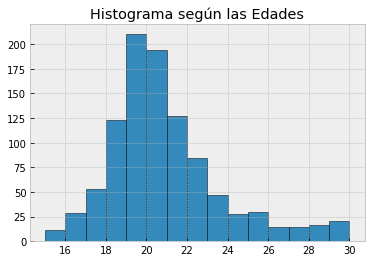

In [11]:
plt.title('Histograma según las Edades')
plt.hist(young['Age'].dropna(), edgeColor='black',bins=15);

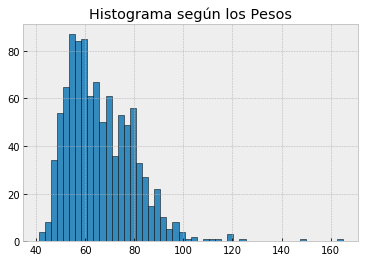

In [12]:
plt.title('Histograma según los Pesos')
plt.hist(young['Weight'].dropna(), edgeColor='black',bins=50);

#### Si bien los histogramas anteriores nos dan una idea de la distribución aproximada de las variables edad y peso, podemos hacer uso de seaborn y aplicar la función distplot() para poder mostrar la distribución aproximada, de una manera más agradable y clara:

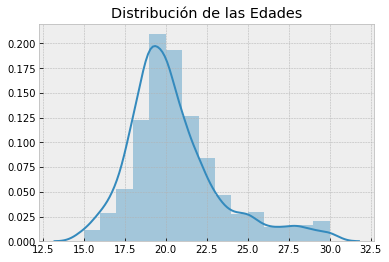

In [13]:
age_hist = np.array(young.Age.dropna())
sns.distplot(age_hist, bins=15).set_title("Distribución de las Edades");


#### Como podemos ver en la imagen anterior, la distribución de las edades se asemeja ó se aproxima a una distribución normal ó Gaussiana (con $\mu\approx 19$).

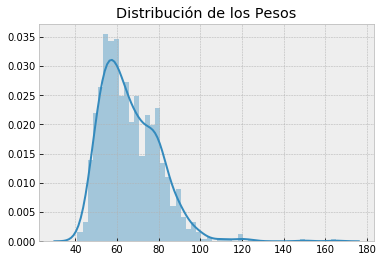

In [14]:
weight_hist = np.array(young.Weight.dropna())
sns.distplot(weight_hist, bins=50).set_title("Distribución de los Pesos");

#### Por otra parte, la distribución de los pesos, se asemeja a una distribución Gamma ó tal vez podríamos decir que a una distribución normal sesgada hacia la derecha. Si se aumentara la cantidad de muestras (con un dataset más grande) seguramente ésta variable también se aproximaría mucho más a una distribución normal, como en la mayoría de los casos.
****

### Explorando los datos: Valores faltantes

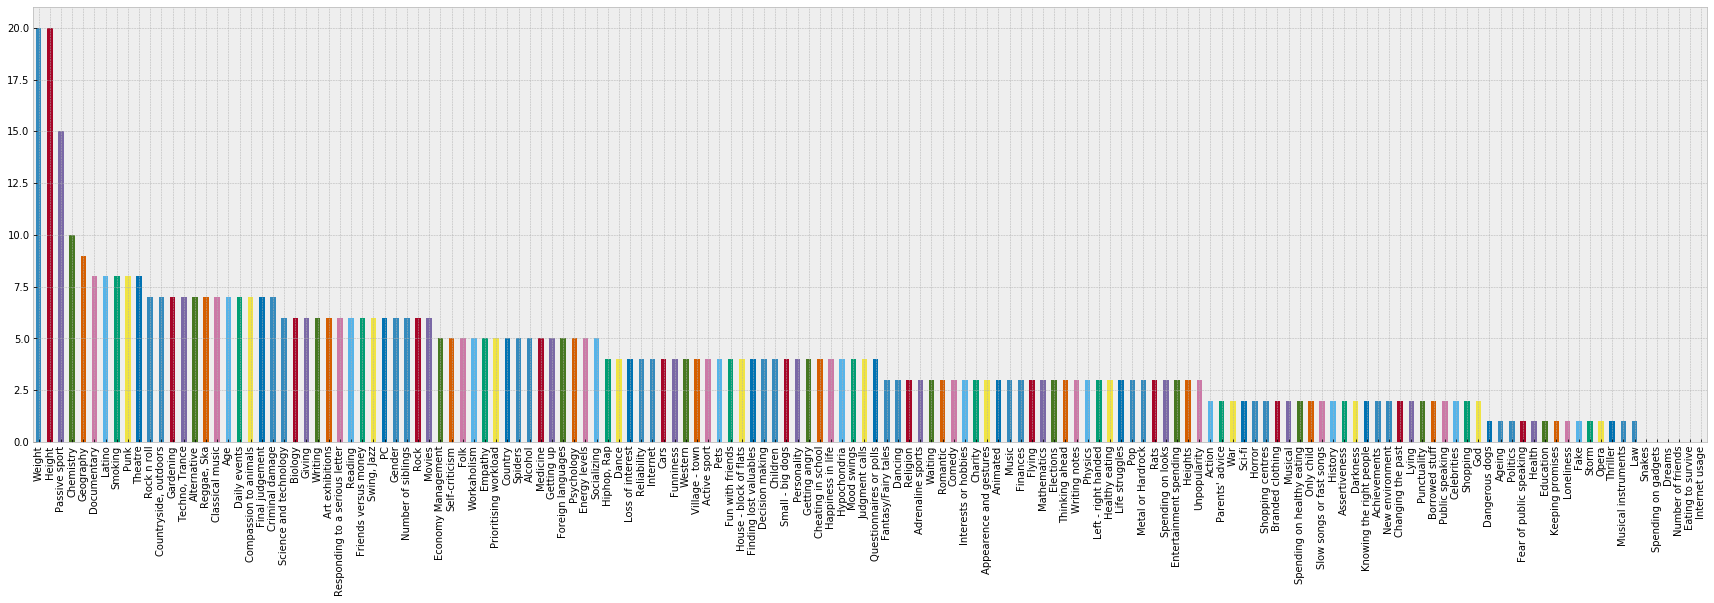

In [15]:
nulls = young.isnull().sum().sort_values(ascending=False)
_ = nulls.plot(kind='bar', figsize = (30,8))

#### Los valores faltantes son un problema porque no sabemos por qué las personas no completaron este campo o tal vez hubo un error posterior al procesamiento en el conjunto de datos. Esta faltante de datos es un limitante a la hora de realizar los cálculos estadísticos sobre nuestro set de datos, aunque en este caso puntual los datos faltantes no representan una limitante significativa frente a la cantidad total de datos.

In [16]:
print('\nNúmero de mujeres que omitieron el campo "Peso": {:.0f}'.format(young[young['Gender']=='female']['Weight'].isnull().sum()))
print('Número de hombres que omitieron el campo "Peso: {:.0f}'.format(young[young['Gender']=='male']['Weight'].isnull().sum()))
print('Número de mujeres que omitieron el campo "Altura": {:.0f}'.format(young[young['Gender']=='female']['Height'].isnull().sum()))
print('Número de hombres que omitieron el campo "Altura": {:.0f}'.format(young[young['Gender']=='male']['Height'].isnull().sum()))
omitted = young[(young['Weight'].isnull()) | young['Height'].isnull()]
print('Número de personas que omitieron el campo "Peso" ó "Altura": {:.0f}'.format(omitted.shape[0]))


Número de mujeres que omitieron el campo "Peso": 13
Número de hombres que omitieron el campo "Peso: 6
Número de mujeres que omitieron el campo "Altura": 13
Número de hombres que omitieron el campo "Altura": 6
Número de personas que omitieron el campo "Peso" ó "Altura": 30


****
### Análisis de Outliers:
#### En primer lugar vamos a explicar brevemente el significado de "outlier". Un "outlier" ó valor atípico es una observación que es numéricamente distante del resto de los datos. Las estadísticas derivadas de los conjuntos de datos que incluyen valores atípicos son frecuentemente engañosas. Por ejemplo, en el cálculo de la temperatura media de 10 objetos en una habitación, si la mayoría tienen entre 20 y 25 ºC, pero hay un horno a 350 °C, la mediana de los datos puede ser 23, pero la temperatura media será 55. En este caso, la mediana refleja mejor la temperatura de la muestra al azar de un objeto que la media. Los valores atípicos pueden ser indicativos de datos que pertenecen a una población diferente del resto de las muestras establecidas.


#### A modo de ejemplo en el análisis de outliers en primer lugar nos vamos a centrar en las diferencias en altura, peso y edad entre personas de diferentes áreas (urbana y rural):

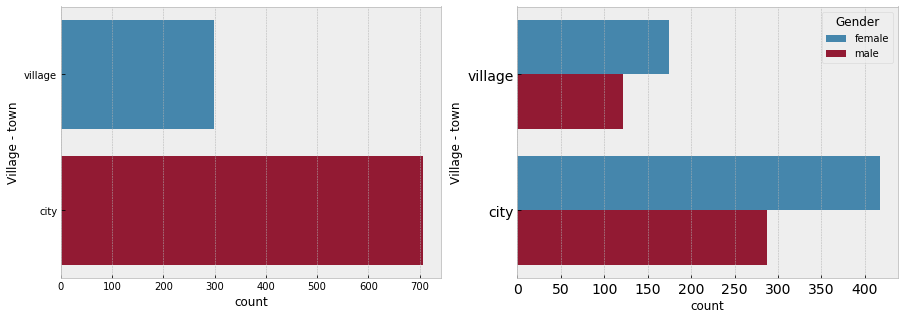

In [17]:
var_of_interest = 'Village - town'
mapping = {var_of_interest: {'city': 0, 'village': 1}}
young.dropna(subset=[var_of_interest], inplace=True)
young["all"] = ""

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
sns.countplot(y = var_of_interest, data = young, ax = ax[0])
sns.countplot(y = var_of_interest, hue = 'Gender', data = young, ax = ax[1])
_ = plt.xticks(fontsize=14)
_ = plt.yticks(fontsize=14)

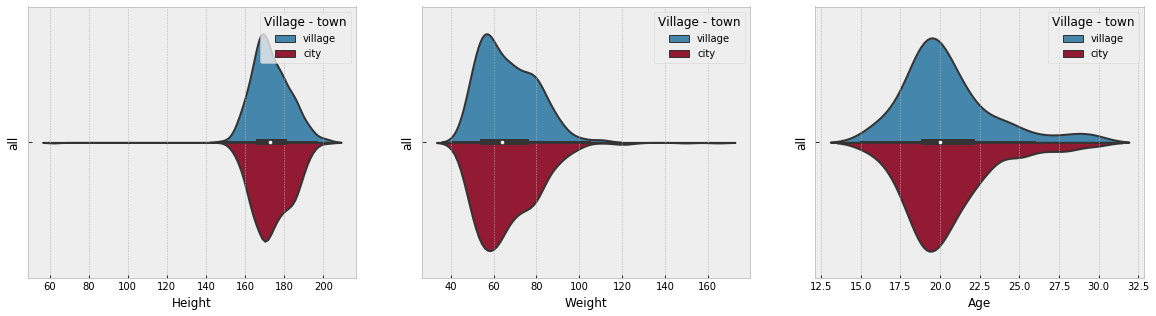

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
data = young.dropna(subset=['Height'])
_ = sns.violinplot(x='Height', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[0])
data = young.dropna(subset=['Weight'])
_ = sns.violinplot(x='Weight', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[1])
data = young.dropna(subset=['Age'])
_ = sns.violinplot(x='Age', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[2])

#_ = sns.distplot(young[young[var_of_interest]=='village'].Age.dropna(),label = 'village', ax = ax[2], kde = False,bins = 30)
#_ = sns.distplot(young[young[var_of_interest]=='city'].Age.dropna(),label = 'city', ax = ax[2], kde = False,bins = 30)

#### Si desglosamos por el lugar donde viven las personas (campo y ciudad), podemos observar que si bien existen diferencias de altura, peso y edad, estas son mínimas. Si miramos los gráficos de violín y contrastamos las gráficas azules (campo) con las gráficas rojas (ciudad), no se observan grandes diferencias. En cuanto a las distribuciones, si bien presentan cierto nivel de sesgo (sobre todo para el peso), podemos decir que todas se aproximan a una distribución normal, lo cual era a priori esperable.

#### Vamos a crear una función en python, remove_outlier(), que nos permite eliminar los valores atípicos, para ello necesitamos calcular los cuartiles $Q_1$ y $Q_3$, con los cuales calcularemos el rango intercuartilico definido como $Q_3-Q_1$. Seguidamente, necesitamos calcular los límites inferior y superior, fuera de los cuales se considerará un valor atípico ó outlier. El límite inferior se define como $L_{inf}=Q_1-1.5 \cdot R_{IQ}$ y el límite superior como $L_{sup}=Q_3+1.5 \cdot R_{IQ}$

Límites de Outliers para Altura:
Límite superior = 199.5
Límite inferior = 147.5

Límites de Outliers para Peso:
Límite superior = 105.0
Límite inferior = 25.0

Límites de Outliers para Edad:
Límite superior = 26.5
Límite inferior = 14.5



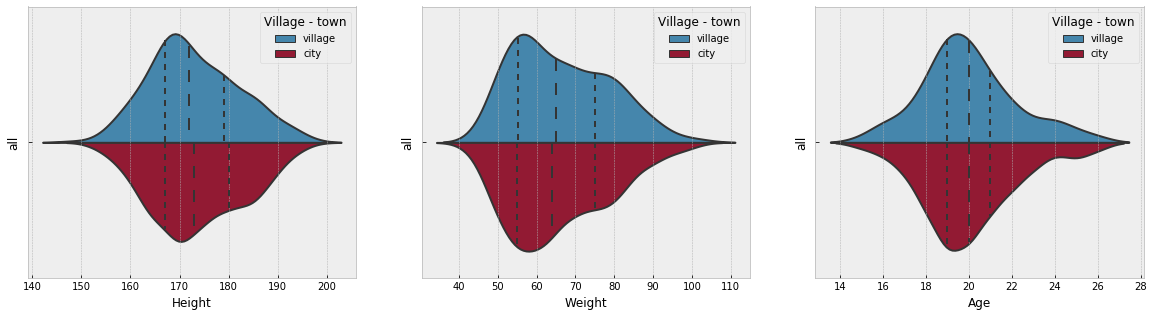

In [19]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25) #1er Cuartil
    q3 = df_in[col_name].quantile(0.75) #3er Cuartil
    iqr = q3-q1 #Rango intercuartilico
    fence_low  = q1-1.5*iqr #Limite inferior 
    fence_high = q3+1.5*iqr #Limite superior
    print("Límite superior = "+str(fence_high))
    print("Límite inferior = "+str(fence_low)+'\n')
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)] #Filtrado de outliers
    return df_out

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
data = young.dropna(subset=['Height'])
print("Límites de Outliers para Altura:")
data = remove_outlier(data,'Height')
_ = sns.violinplot(x='Height', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[0], inner = 'quartile')
data = young.dropna(subset=['Weight'])
print("Límites de Outliers para Peso:")
data = remove_outlier(data,'Weight')
_ = sns.violinplot(x='Weight', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[1], inner = 'quartile')
data = young.dropna(subset=['Age'])
print("Límites de Outliers para Edad:")
data = remove_outlier(data,'Age')
_ = sns.violinplot(x='Age', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[2], inner = 'quartile')

#### Lo que logramos removiendo los valores atípicos, es excluir de la visualización aquellos datos que caen fuera de los límites superior e inferior. Estos datos pueden deberse a datos reales que están lejos de los datos del grueso de las personas o bien a datos mal registrados, mal medidos, errores, etc. Por tal motivo, see justifica su exclusión. 
#### Al tener una mejor visualización de las distribuciones sin los valores atípicos, se puede observar con mayor claridad cierto nivel de sesgo a la derecha, en las distintas distribuciones, las cuales se pueden aproximar a una distribución normal.

### Desglosamiento por género:
#### Anteriormente analizamos las diferencias en altura, peso y edad, segmentando los datos entre las personas que viven en el campo, de las que viven en la ciudad. Ahora nos centramos en las diferencias en altura, peso y edad entre los géneros masculino y femenino:

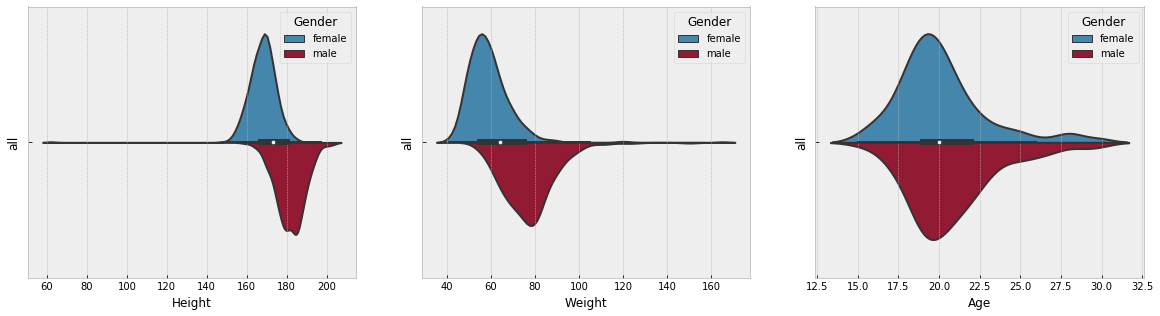

In [20]:
var_of_interest = 'Gender'
mapping = {var_of_interest: {'female': 0, 'male': 1}}
young.dropna(subset=[var_of_interest], inplace=True)
young["all"] = ""

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
data = young.dropna(subset=['Height'])
_ = sns.violinplot(x='Height', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[0])
data = young.dropna(subset=['Weight'])
_ = sns.violinplot(x='Weight', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[1])
data = young.dropna(subset=['Age'])
_ = sns.violinplot(x='Age', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[2])

#_ = sns.distplot(young[young[var_of_interest2]=='female'].Age.dropna(),label = 'female', ax = ax[2], kde = False,bins = 30)
#_ = sns.distplot(young[young[var_of_interest2]=='male'].Age.dropna(),label = 'male', ax = ax[2], kde = False,bins = 30)

#### En ésta situación los resultados muestran una mayor diferencia entre los géneros (con respecto al desglosamiento por lugar donde viven). Claramente podemos observar como los hombres poseen una distribución de las alturas y pesos, más desplazados a la derecha que las mujeres, lo que se traduce en que los hombres son más altos y más pesados que las mujeres (algo que se condice con el "saber" popular). Además, si vemos la distribución de las edades podemos notar que son virtualmente las mismas, esto quiere decir que los rangos etarios son muy parecidos, por lo tanto estamos comparando los pesos y las alturas para un rango etario muy similar.
#### En este caso, las distribuciones se aproximan a una normal, con un menor nivel de sesgo.

#### Nuevamente, utilizamos la función remove_outlier(), para remover los valores atípicos de nuestro análisis:

Límites de Outliers para Altura:
Límite superior = 199.5
Límite inferior = 147.5

Límites de Outliers para Peso:
Límite superior = 105.0
Límite inferior = 25.0

Límites de Outliers para Edad:
Límite superior = 26.5
Límite inferior = 14.5



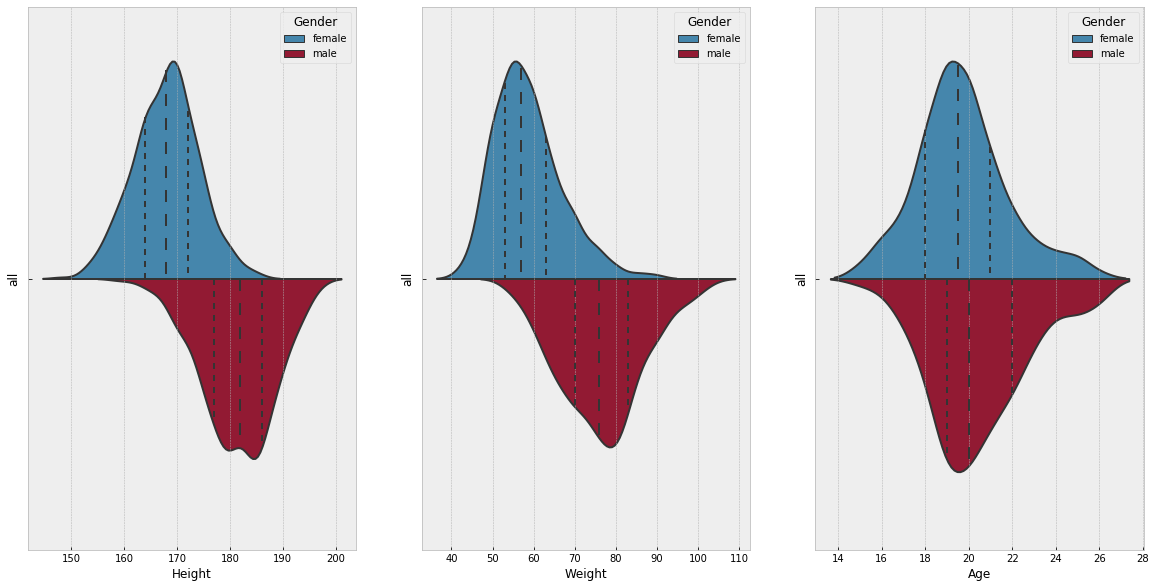

In [21]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25) #1er Cuartil
    q3 = df_in[col_name].quantile(0.75) #3er Cuartil
    iqr = q3-q1 #Rango intercuartilico
    fence_low  = q1-1.5*iqr #Limite inferior
    fence_high = q3+1.5*iqr #Limite superior
    print("Límite superior = "+str(fence_high))
    print("Límite inferior = "+str(fence_low)+'\n')
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)] #Filtrado de outliers
    return df_out

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
data = young.dropna(subset=['Height'])
print("Límites de Outliers para Altura:")
data = remove_outlier(data,'Height')
_ = sns.violinplot(x='Height', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[0], inner = 'quartile')
data = young.dropna(subset=['Weight'])
print("Límites de Outliers para Peso:")
data = remove_outlier(data,'Weight')
_ = sns.violinplot(x='Weight', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[1], inner = 'quartile')
data = young.dropna(subset=['Age'])
print("Límites de Outliers para Edad:")
data = remove_outlier(data,'Age')
_ = sns.violinplot(x='Age', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[2], inner = 'quartile')

#### Al remover los outliers, podemos tener una mejor visualización de las gráficas de violín.

#### Como podemos ver si desglosamos por género, los datos responden aproximadamente a una distribución normal, lo cual es muy común en la mayoría de los casos. Si bien puede no ser una distribución normal exacta, podemos aproximarla bastante bien con ella.

### Correlación entre las variables:

In [22]:
def do_ploting(x, y, figsize):
    fig, ax = plt.subplots(figsize= figsize)
    ax.set_title("Correlation coefficient of the variables")
    sns.barplot(x=x, y=y,  ax = ax)
    ax.set_ylabel("Correlation coefficients")

def correlation_plot(var_of_interest, df_main, mapping, figsize = (10,30)):
    def calc_corr(var_of_interest, df, cols, figsize):
        lbls = []
        vals = []
        for col in cols:
            lbls.append(col)
            vals.append(np.corrcoef(df[col], df[var_of_interest])[0,1])
        corrs = pd.DataFrame({'features': lbls, 'corr_values': vals})
        corrs = corrs.sort_values(by='corr_values')
        do_ploting(corrs.corr_values, corrs['features'], figsize)
        return corrs
    #imputing the set
    df = copy.deepcopy(df_main)
    df.replace(mapping, inplace = True)
    mean_values = df.mean(axis=0)
    df.fillna(mean_values, inplace=True)
    
    #correlating non-categorical variables
    cols_floats = [col for col in df.columns if df[col].dtype!='object']
    cols_floats.remove(var_of_interest)
    corrs_one = calc_corr(var_of_interest, df, cols_floats, figsize)
    
    #correlating categorical variables
    cols_cats = [col for col in df.columns if df[col].dtype=='object']
    if cols_cats:
        df_dummies = pd.get_dummies(df[cols_cats])
        cols_cats = df_dummies.columns
        df_dummies[var_of_interest] = df[var_of_interest]
        corrs_two = calc_corr(var_of_interest, df_dummies, cols_cats, (5,10))
    else:
        corrs_two = 0
    return [corrs_one, corrs_two]

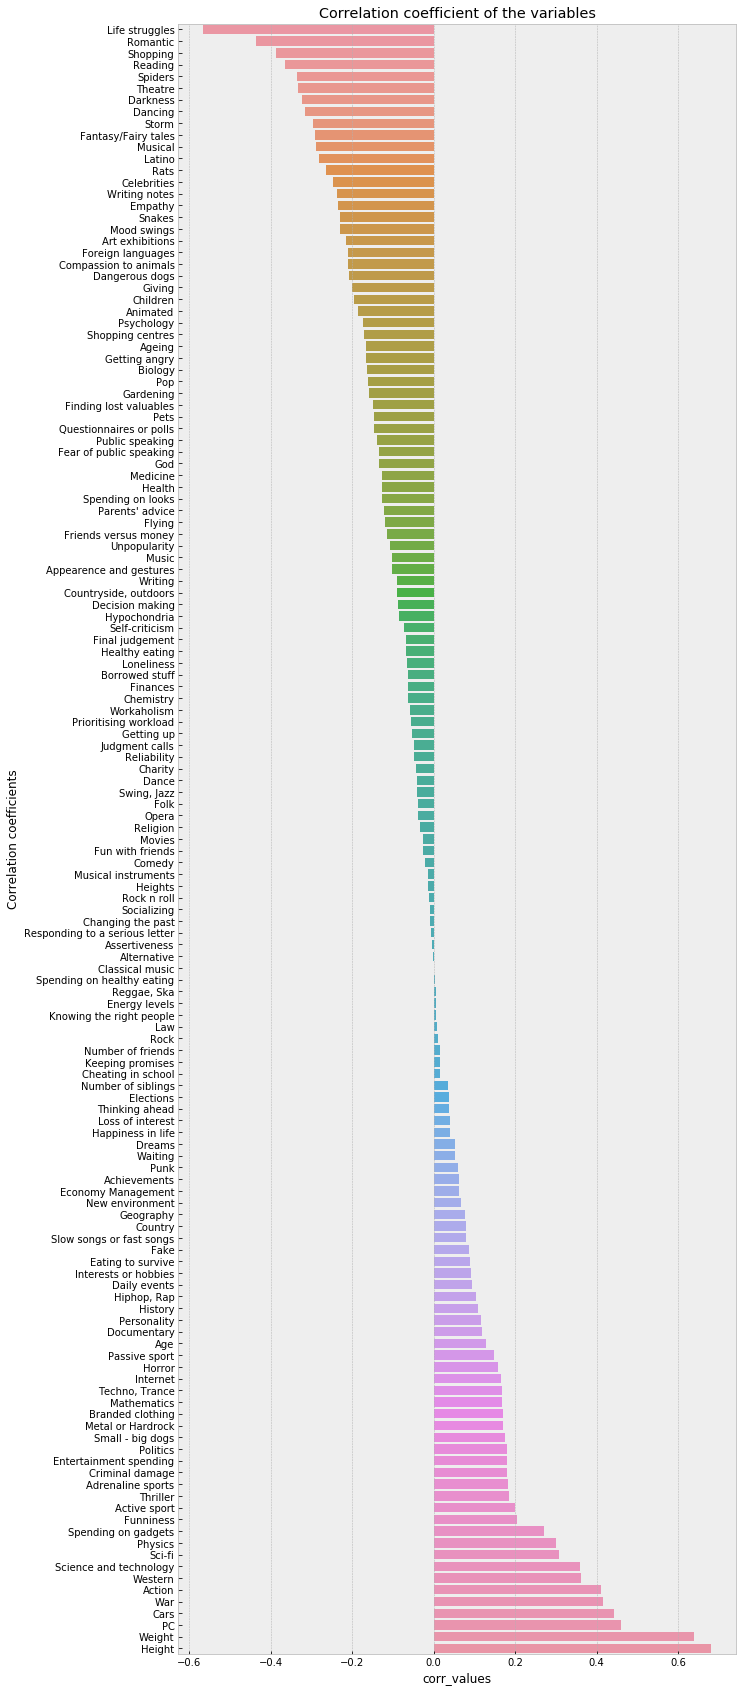

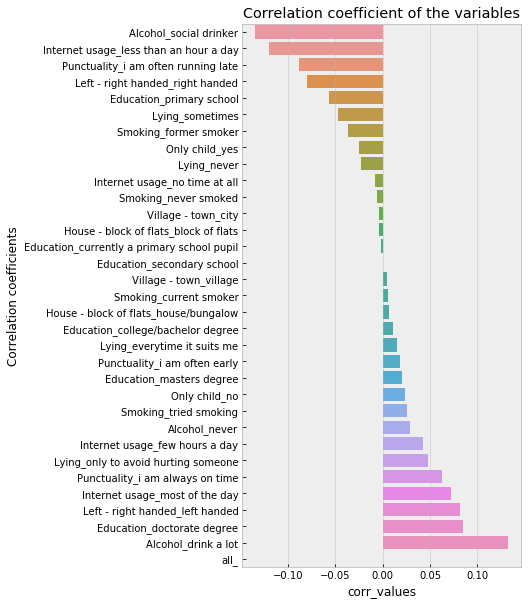

In [23]:
var_of_interest = 'Gender'
mapping = {var_of_interest: {'female': 0, 'male': 1}}
young.dropna(subset=[var_of_interest], inplace=True)
# to be able to use hue parameter for better comparison in seaborn
young["all"] = ""

corrs_area = correlation_plot(var_of_interest, young, mapping)

#### Vamos a analizar cuales son las correlaciones más fuertes que tenemos entre las diferentes variables y los géneros, recordemos que un valor alto de correlación puede ser tanto positiva como negativa, por lo cual tenemos que tener en cuenta esos dos casos, además tenemos variables categóricas y no categóricas, por lo cual tendremos en total 4 valores de correlación:

In [24]:
#The strongest correlations that we have are  
corr_num = corrs_area[0]
corr_cats = corrs_area[1]
print("Máxima correlación positiva - Varible Numérica:")
display(corr_num[corr_num.corr_values == max(corr_num.corr_values)])
print("\n\nMínima correlación negativa - Varible Numérica:")
display(corr_num[corr_num.corr_values == min(corr_num.corr_values)])
print("\n\nMáxima correlación positiva - Varible Categórica:")
display(corr_cats[corr_cats.corr_values == max(corr_cats.corr_values)])
print("\n\nMínima correlación negativa - Varible Categórica:")
display(corr_cats[corr_cats.corr_values == min(corr_cats.corr_values)])

Máxima correlación positiva - Varible Numérica:


,corr_values,features
136,0.680314,Height




Mínima correlación negativa - Varible Numérica:


,corr_values,features
118,-0.564743,Life struggles




Máxima correlación positiva - Varible Categórica:


,corr_values,features
4,0.13267,Alcohol_drink a lot




Mínima correlación negativa - Varible Categórica:


,corr_values,features
6,-0.135223,Alcohol_social drinker


#### La máxima correlación positiva se presenta entre el género y el peso, la mínima correlación negativa se presenta entre los problemas de la vida y el género. Y en menor medida, tenemos una correlación más pequeña entre el género y el consumo de alcohol.

****
## Punto 2:

### Calcular la probabilidad marginal y conjunta, y la correlación entre otras dos variables: alcohol y tabaquismo.

#### Para ello vamos a definir los conceptos de probabilidad marginal y probabilidad conjunta:
#### Probabilidad Marginal: Probabilidad de una variable sin considerar otra, por ejemplo.
$$P_X=P[X=x]=\sum_{\forall y_i}p_{xy}(x,y_i)$$

#### En primer lugar mostramos las probabilidades marginales de la variable tabaquismo y también mostramos un gráfico con dichos resultados:

Tabla de Frecuencia de Probabilidades por Tabaquismo:

Años: 		  Probabilidades:
tried smoking     0.428427
never smoked      0.207661
current smoker    0.189516
former smoker     0.174395
Name: Smoking, dtype: float64


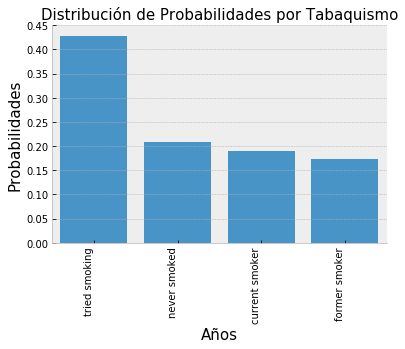

In [25]:
fdp_fumador = young.Smoking.value_counts(normalize=True)

print("Tabla de Frecuencia de Probabilidades por Tabaquismo:\n")
print("Años: \t\t  Probabilidades:")
print(fdp_fumador)

plt.figure()
ax = sns.barplot(data=fdp_fumador.to_frame().reset_index(),
    x='index', y='Smoking', color='#3498db')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
sns.set(rc={'figure.figsize':(12,10)}) #Ajusto el tamaño de la figura
ax.set_title("Distribución de Probabilidades por Tabaquismo",fontsize=15)
ax.set_xlabel("Años",fontsize=15)
ax.set_ylabel("Probabilidades",fontsize=15)
sns.despine()

#### Seguidamente, mostramos las probabilidades marginales de la variable alcohol y también mostramos un gráfico con dichos resultados:

Tabla de Frecuencia de Probabilidades por Consumo de Alcohol:

Años: 		  Probabilidades:
social drinker    0.655276
drink a lot       0.221106
never             0.123618
Name: Alcohol, dtype: float64


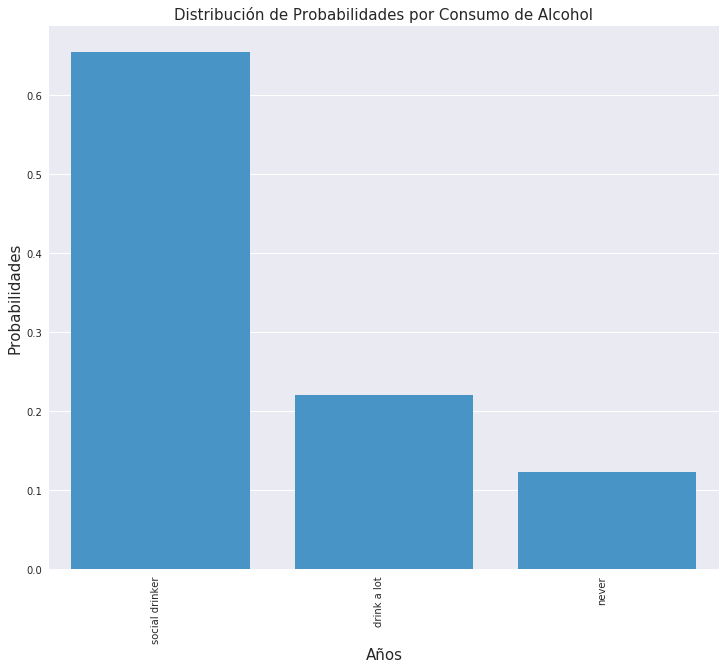

In [26]:
fdp_alcohol = young.Alcohol.value_counts(normalize=True)

print("Tabla de Frecuencia de Probabilidades por Consumo de Alcohol:\n")
print("Años: \t\t  Probabilidades:")
print(fdp_alcohol)

plt.figure()
ax = sns.barplot(data=fdp_alcohol.to_frame().reset_index(),
    x='index', y='Alcohol', color='#3498db')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
sns.set(rc={'figure.figsize':(11,8)}) #Ajusto el tamaño de la figura
ax.set_title("Distribución de Probabilidades por Consumo de Alcohol",fontsize=15)
ax.set_xlabel("Años",fontsize=15)
ax.set_ylabel("Probabilidades",fontsize=15)
sns.despine()

#### Probabilidad Conjunta: En un espacio muestral bivariable o multimavariable cada resultado posible hace referencia a dos ó más características. Entonces la probabilidad de un resultado conjunto es denotado como, $P(X \cap Y)$ y se define como:
$$P_{XY}=P[(X=x)\cap(Y=y)]$$

In [27]:
tabla = pd.crosstab(index=young['Smoking'],columns=young['Alcohol'], normalize=True, margins=True)
print("Tabla de Contingencia con las dos variables a analizar y sus probabilidades:")
display(tabla)

Tabla de Contingencia con las dos variables a analizar y sus probabilidades:


Alcohol,drink a lot,never,social drinker,All
Smoking,,,,
current smoker,0.077778,0.011111,0.100000,0.188889
former smoker,0.054545,0.011111,0.109091,0.174747
never smoked,0.015152,0.060606,0.131313,0.207071
tried smoking,0.072727,0.039394,0.317172,0.429293
All,0.220202,0.122222,0.657576,1.000000


#### Luego, mostramos los datos de la tabla de contingencia de tres maneras distintas, la primera usando un gráfico de barras (con el parámetro stacked habilitado), la segunda usando un mapa de calor y la tercera usando un mosaico de la librería "statsmodels", la cual debemos importar previamente:

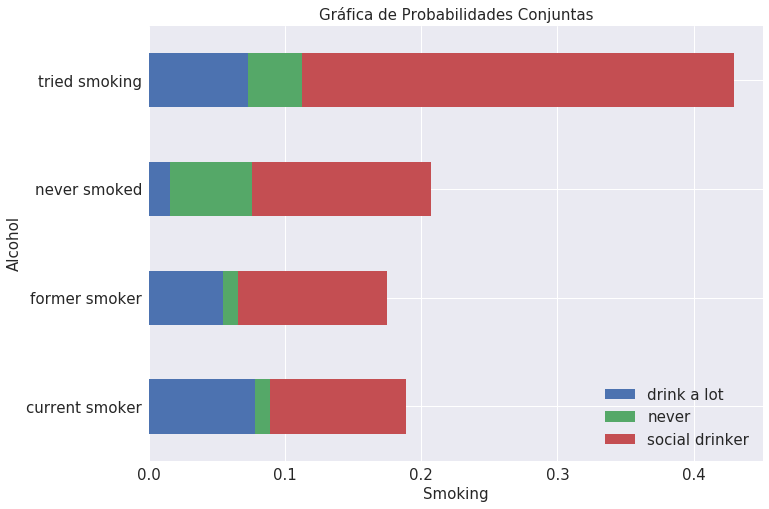

In [28]:
tabla = pd.crosstab(index=young['Smoking'],columns=young['Alcohol'],normalize=True)
plot = tabla.plot(kind='barh',stacked=True,figsize=(11, 8), legend=True, fontsize=15)
plot.set_title("Gráfica de Probabilidades Conjuntas",fontsize=15)
plot.set_xlabel("Smoking",fontsize=15)
plot.set_ylabel("Alcohol",fontsize=15)
plot.legend(fontsize=15)
sns.despine()

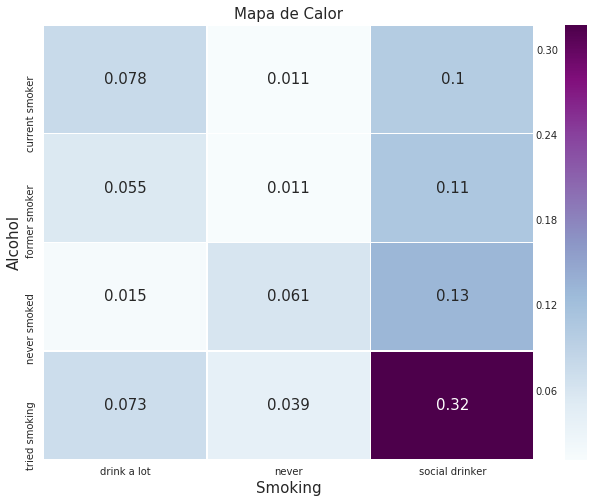

In [29]:
tabla_sin_margin = pd.crosstab(index=young['Smoking'],columns=young['Alcohol'],normalize=True)
plt.figure(figsize=(11,8))
sns.heatmap(tabla_sin_margin, annot=True, annot_kws={"size": 15}, linewidths=.5, cmap="BuPu")
plt.xlabel("Smoking",fontsize=15)
plt.ylabel("Alcohol",fontsize=15)
plt.title("Mapa de Calor",fontsize=15)
sns.despine()

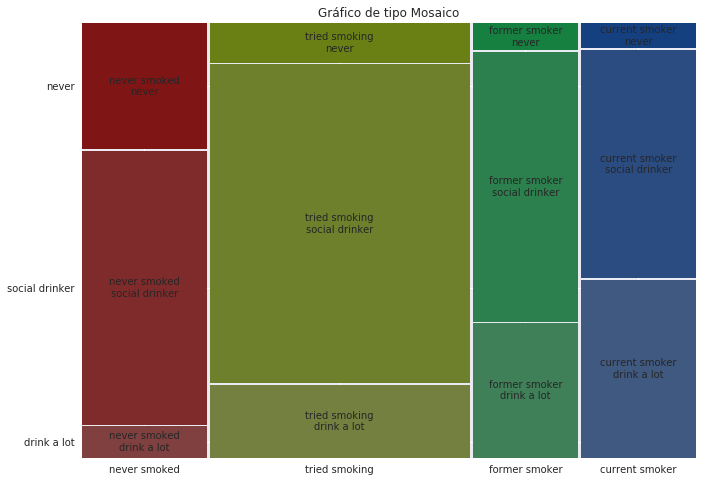

In [30]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(young, ['Smoking', 'Alcohol'], title='Gráfico de tipo Mosaico');

## Correlación entre el consumo de alcohol y el tabaquismo:
#### A continuación vamos a calcular la correlación entre el consumo de alcohol y el tabaquismo. Para ello debemos recordar que dichas categorías NO son numéricas, por lo que es necesario cambiar dichos strings por valores numéricos:

In [31]:
fumador = young.Smoking.replace("never smoked", 1) #Nunca fumó, le asigno un valor de 1
fumador = fumador.replace("tried smoking", 2) #Alguna vez fumó, le asigno un valor de 2
fumador = fumador.replace("former smoker", 3) #Exfumador, le asigno un valor de 3
fumador = fumador.replace("current smoker", 4) #Actual fumador, le asigno un valor de 4
alcohol = young.Alcohol.replace("never", 1) #Nunca tomó alcohol, le asigno un valor de 1
alcohol = alcohol.replace("social drinker", 2) #Toma alcohol de manera social, le asigno un valor de 2
alcohol = alcohol.replace("drink a lot", 3) #Toma mucho alcohol, le asigno un valor de 3

#Armo un DataFrame con las categorías Alcohol y Smoking con valores numéricos
para_correlacion = pd.DataFrame({'Smoking':fumador,'Alcohol':alcohol})

print("\nMuestro 5 filas de mi nuevo DataFrame con valores numéricos y las categorías 'Alcohol' y 'Smoking'")
display(para_correlacion.dropna().head(5))


Muestro 5 filas de mi nuevo DataFrame con valores numéricos y las categorías 'Alcohol' y 'Smoking'


,Alcohol,Smoking
0,3.0,1.0
1,3.0,1.0
2,3.0,2.0
3,3.0,3.0
4,2.0,2.0


#### Calculo la correlación:

In [32]:
para_correlacion.dropna().corr()

,Alcohol,Smoking
Alcohol,1.000000,0.323619
Smoking,0.323619,1.000000


#### Podemos extraer que el coeficiente de correlación entre alcohol y tabaquismo, es de $Corr=0.3236$. Estamos en presencia de una correlación positiva lo cual nos indica que la relación que hay entre las variables es directamente proporcional, en la práctica esto nos dice que si para una persona el consumo de alcohol es alto probablemente pase lo mismo con el consumo de tabaco. 

****

## Punto 3:
### Niveles de Tabaquismo y la prohición de fumar en los bares

#### En primer lugar, la información sobre tabaquismo la podemos encontrar en el dataset con el nombre de "Smoking", pero no así los datos sobre la presencia de bares. Sin embargo, podemos asociar la información de consumo de alcohol (que sí existe en el dataset) con la presencia de bares.

#### A continuación, analizamos los datos del tabaquismo (los cuales son datos del tipo "string"). Al ser datos "string" no podemos calcularle los estadísticos básicos sin aplicar algún tipo de procesamiento, que es justo lo que vamos a hacer.

#### Además, mostramos los datos sobre consumo de alcohol (que nos permite inferir la presencia de bares).

In [33]:
cuenta_fumadores_string = young.Smoking.value_counts().to_frame()
cuenta_alcohol_string = young.Alcohol.value_counts().to_frame()

display(cuenta_fumadores_string, cuenta_alcohol_string)

,Smoking
tried smoking,425
never smoked,206
current smoker,188
former smoker,173


,Alcohol
social drinker,652
drink a lot,220
never,123


#### Si deseamos calcularle estadísticos básicos a las categorías de consumo de alcohol y tabaquismo, debemos asignarle un valor númerico a cada una de las respuestas posibles. Para el caso del consumo de tabaco, hay 4 respuestas por lo tanto la escala numérica es de 1 al 4. En cambio, el consumo de alcohol tiene 3 respuestas posibles, por lo cual la escala será del 1 al 3.

1. Consumo de Tabaco:
    * Nunca fumó, le asigno un valor de $1$.
    * Alguna vez fumó, le asigno un valor de $2$.
    * Exfumador, le asigno un valor de $3$.
    * Actual fumador, le asigno un valor de $4$.
2. Consumo de Alcohol:
    * Nunca tomó alcohol, le asigno un valor de $1$.
    * Toma alcohol de manera social, le asigno un valor de $2$.
    * Toma mucho alcohol, le asigno un valor de $3$.

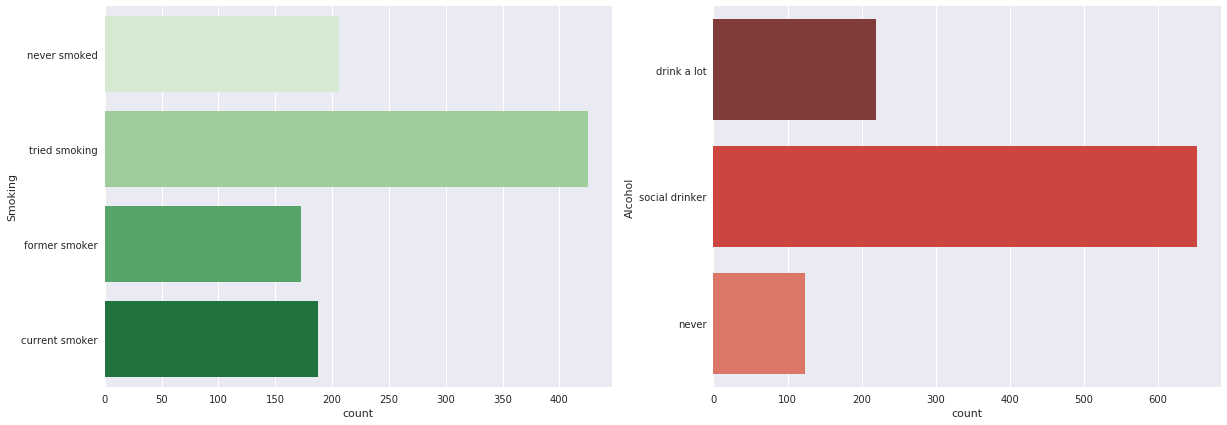

In [34]:
fumador = young.Smoking.replace("never smoked", 1) #Nunca fumó, le asigno un valor de 1
fumador = fumador.replace("tried smoking", 2) #Alguna vez fumó, le asigno un valor de 2
fumador = fumador.replace("former smoker", 3) #Exfumador, le asigno un valor de 3
fumador = fumador.replace("current smoker", 4) #Actual fumador, le asigno un valor de 4
#cuenta_fumadores_num = fumador.value_counts().to_frame()

alcohol = young.Alcohol.replace("never", 1) #Nunca tomó alcohol, le asigno un valor de 1
alcohol = alcohol.replace("social drinker", 2) #Toma alcohol de manera social, le asigno un valor de 2
alcohol = alcohol.replace("drink a lot", 3) #Toma mucho alcohol, le asigno un valor de 3
#cuenta_alcohol_num = alcohol.value_counts().to_frame()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
_ = sns.countplot(y="Smoking", data=young, palette="Greens", ax = ax[0])
_ = sns.countplot(y="Alcohol", data=young, palette="Reds_d", ax = ax[1])

#### A continuación vamos a ver los resultados si analizamos los dos datos categóricos "Smoking" y "Alcohol" en simultáneo y usamos la gráfica countplot() de seaborn:

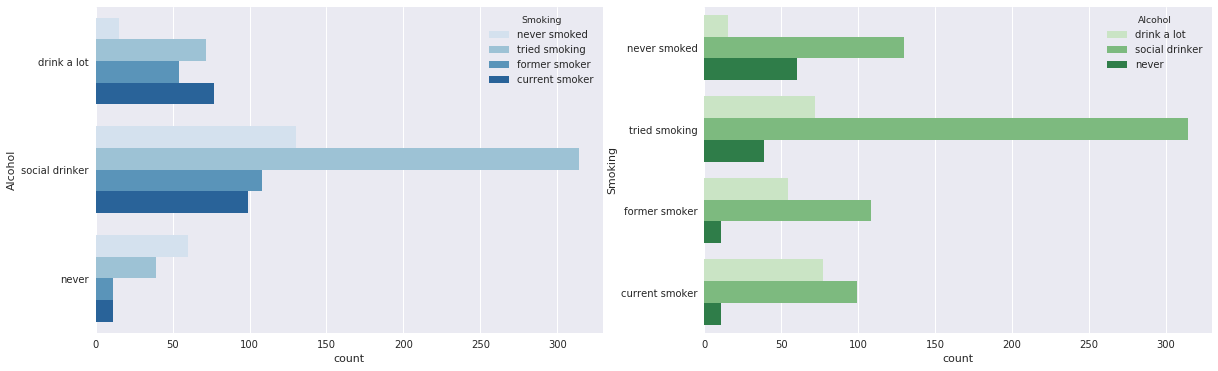

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
_ = sns.countplot(y="Alcohol", hue="Smoking", data=young, palette="Blues", ax = ax[0]);
_ = sns.countplot(y="Smoking", hue="Alcohol", data=young, palette="Greens", ax = ax[1]);

#### Se observa claramente que la mayoría de las personas han probado el tabaco y son consumidores sociales de alcohol. Se podría inferir que la mayoría de las personas consumen alcohol cuando están en grupo con otras y este entorno social a su vez genera la curiosidad por probar otras cosas como el tabaco, es decir, una persona sin necesariamente ser fumadora puede tener contacto con el tabaco debido al entorno en el que se encuentra.

In [36]:
fumador.to_frame().describe()

,Smoking
count,992.000000
mean,2.345766
std,1.010741
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,4.000000


#### Si vemos los resultados para el consumo de tabaco, podemos decir que la mayoría lo ha probado, ya que la media es de $2.34$, recordemos que $2$ corresponde a que "alguna vez fumó".

In [37]:
alcohol.to_frame().describe()

,Alcohol
count,995.000000
mean,2.097487
std,0.579273
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,3.000000


#### De la misma forma, podemos decir que la mayoría son consumidores de alcohol de forma social, ya que la media es de $2.09$ (recordemos que $2$ corresponde a "toma alcohol de manera social").

### Análisis desde la perpectiva humana, de los datos de alcohol y tabaquismo:
#### Como pudimos ver anteriormente, en promedio, la gente alguna vez ha probado el tabaco y la mayoría es bebedora social. Entonces, 
* ¿Qué pasaría con los niveles de tabaquismo si se prohíbe fumar en los bares?

#### Resultaría lógico que los niveles de tabaquismo disminuyan. Esto debido a que si la mayoría de las personas son consumidores sociales de alcohol probablemente lo hacen en bares, y ocasionalmente pueden consumir tabaco en estas circunstancias. Si se prohibiera el consumo de tabaco en bares estos fumadores circunstanciales probablemente disminuirían su consumo de tabaco.

* ¿Qué pasaría con la cantidad de consumidores de alcohol si disminuye la cantidad de fumadores que consumen alcohol? 

#### Si las personas que fuman y consumen alcohol, por algún motivo como por ejemplo que se prohiba fumar en los bares, deja de frecuentar los bares debido a que ya no puede fumar en ellos, el consumo de alcohol en las personas va a disminuir, tal vez no la cantidad de consumidores pero probablemente las personas consuman alcohol en menor medida.

#### Volvemos a mostrar el mapa de calor para los dos datos categóricos "Alcohol" y "Smoking", para poder comprobar que nuestras respuestas anteriores se corresponden con los datos reales:

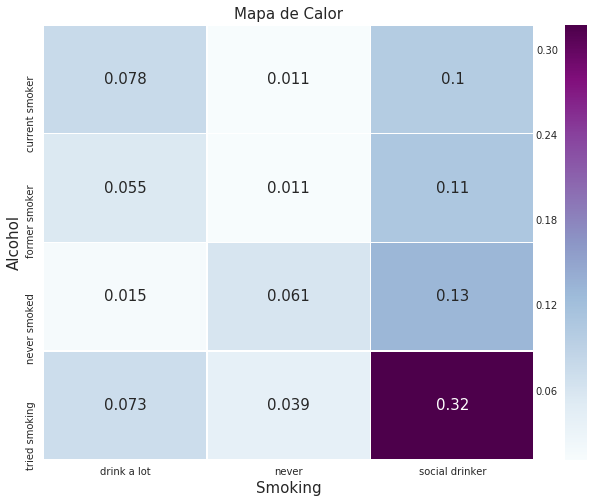

In [38]:
tabla_sin_margin = pd.crosstab(index=young['Smoking'],columns=young['Alcohol'],normalize=True)
plt.figure(figsize=(11,8))
sns.heatmap(tabla_sin_margin, annot=True, annot_kws={"size": 15}, linewidths=.5, cmap="BuPu")
plt.xlabel("Smoking",fontsize=15)
plt.ylabel("Alcohol",fontsize=15)
plt.title("Mapa de Calor",fontsize=15)
sns.despine()

****
****

# Extras:

## Otras visualizaciones de los datos:

#### Elegimos algunas características (numéricas) y las analizamos desglosando por género mediante un gráfico de caja:

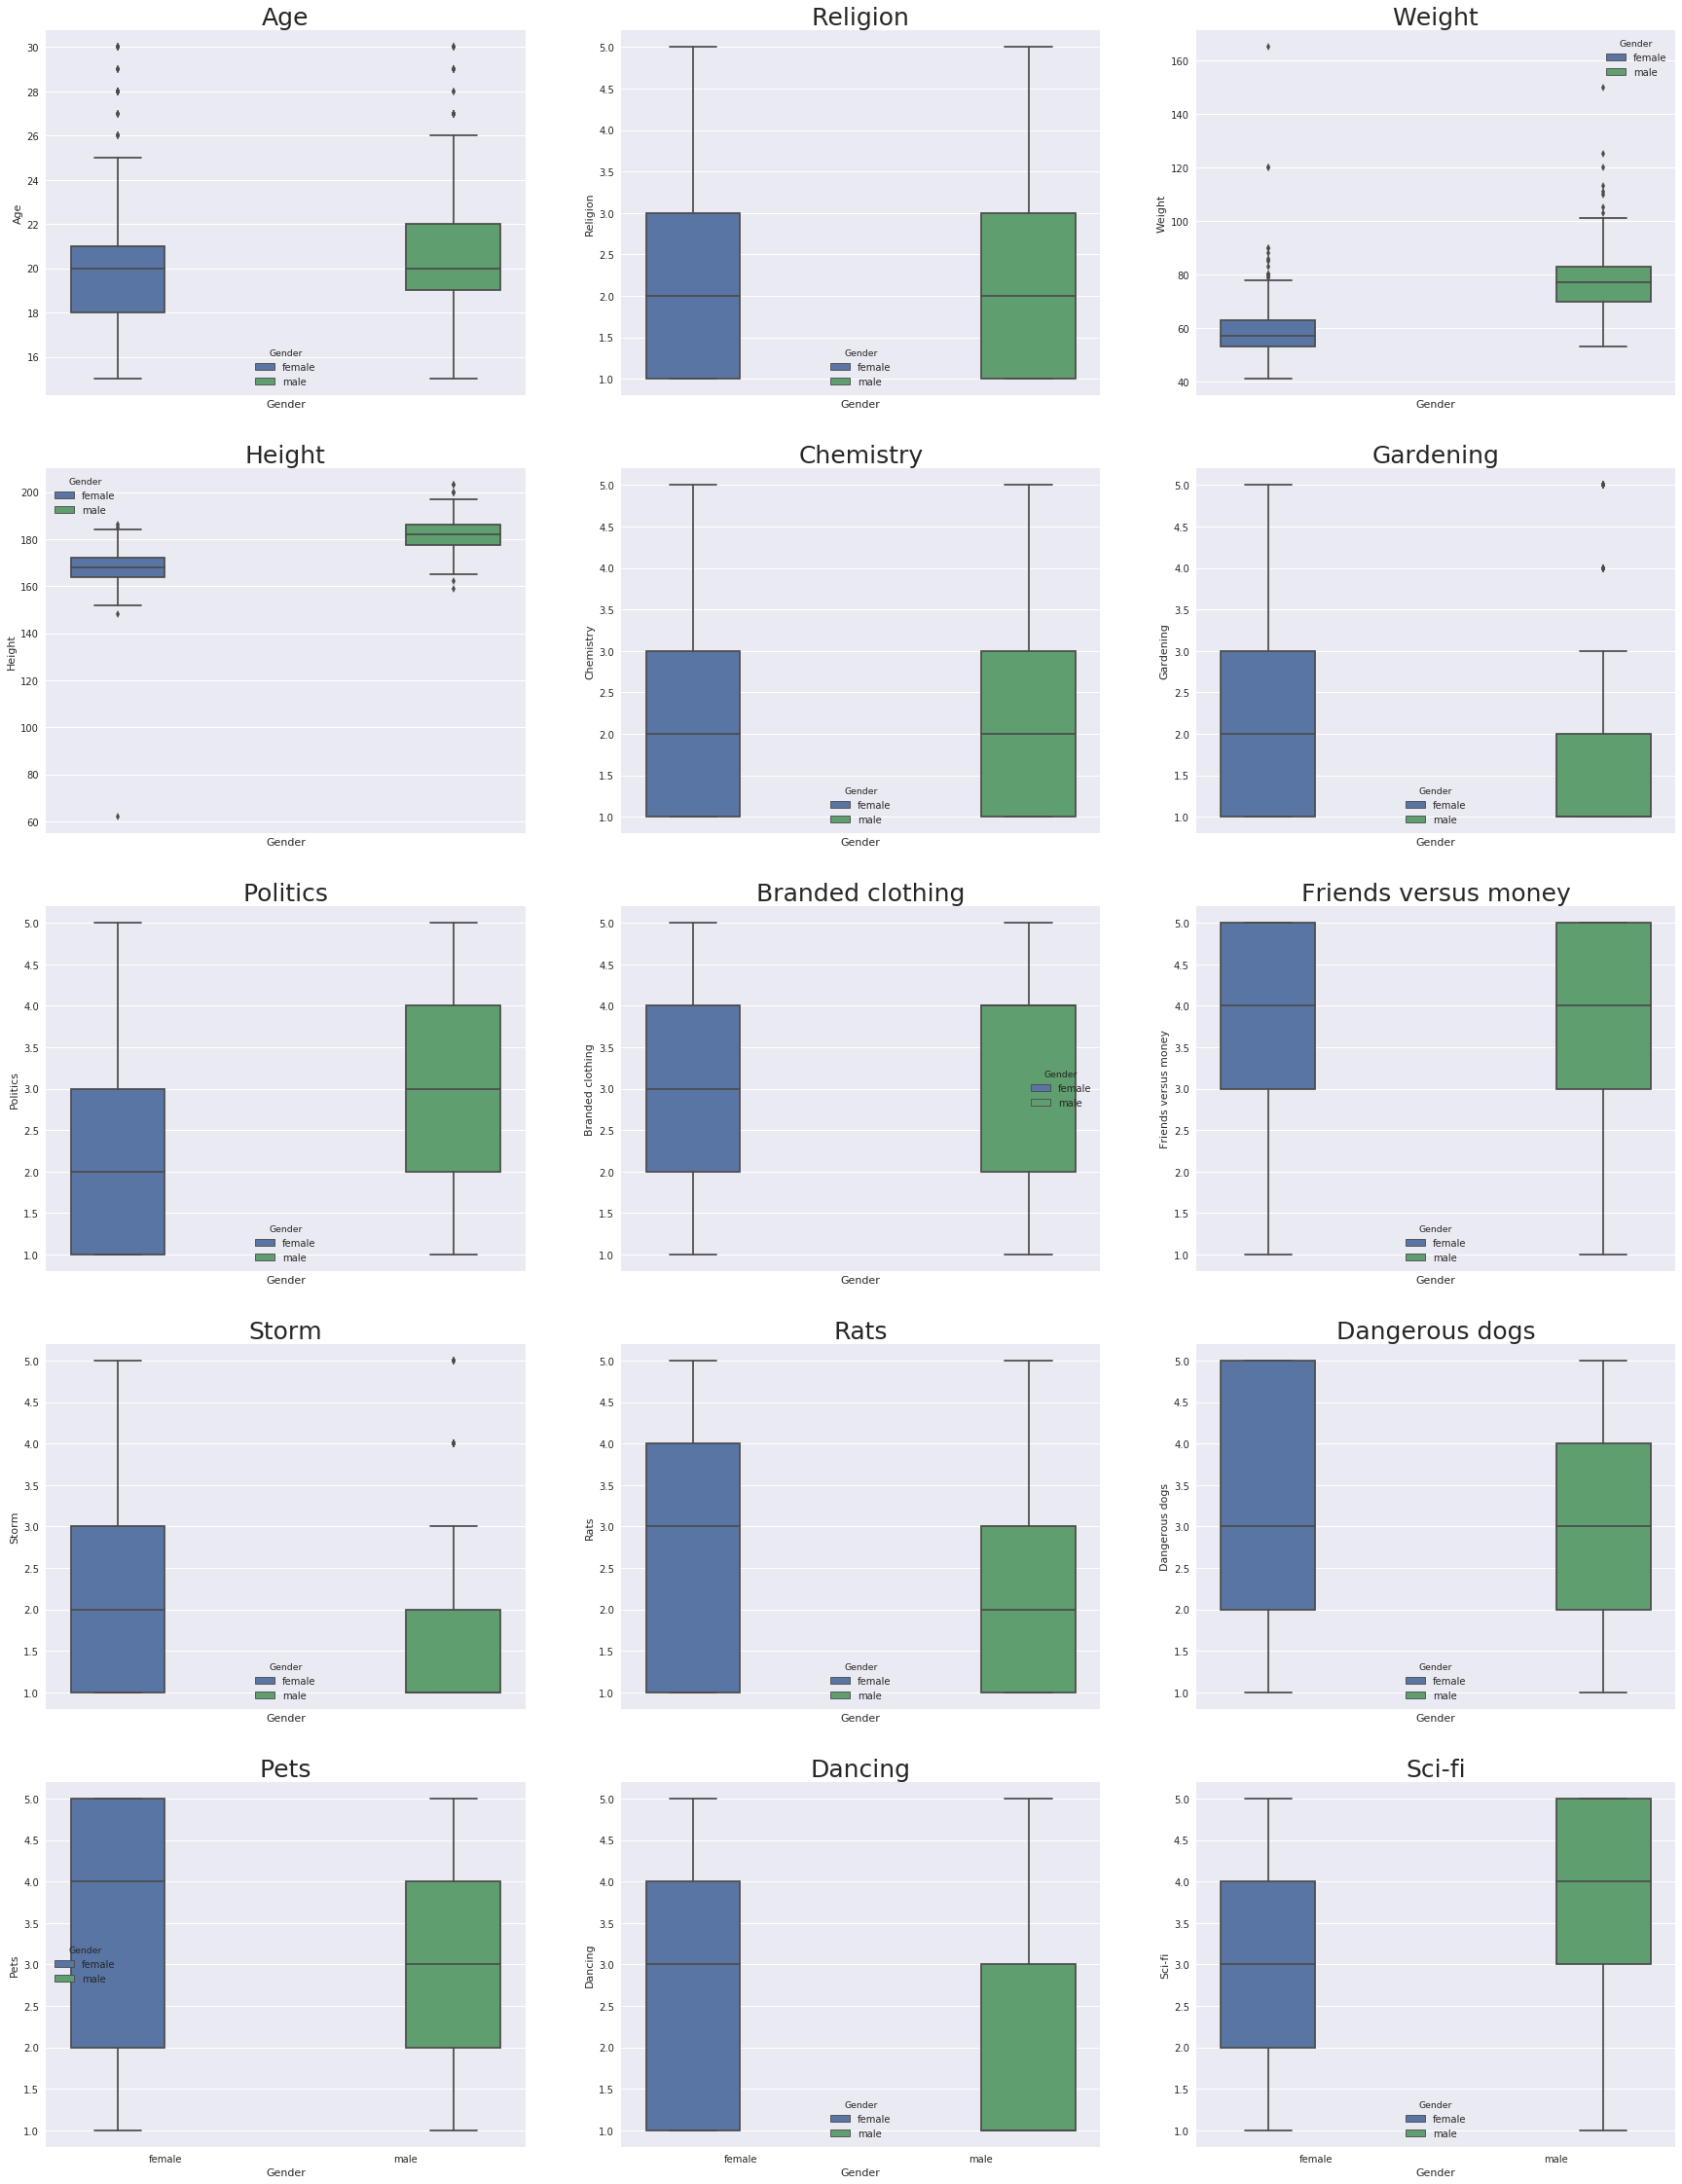

In [39]:
var_of_interest = 'Gender'
good_columns =                ['Age',      'Religion',          'Weight']
good_columns = good_columns + ['Height',   'Chemistry',         'Gardening']
good_columns = good_columns + ['Politics', 'Branded clothing',  'Friends versus money']
good_columns = good_columns + ['Storm',    'Rats',              'Dangerous dogs']
good_columns = good_columns + ['Pets',     'Dancing',           'Sci-fi']
fig, ax = plt.subplots(nrows = 5, ncols = 3 ,figsize=(30,40), sharex=True)
start = 0
for j in range(5):
    for i in range(3):
        if start == len(good_columns):
            break
        sns.boxplot(y=good_columns[start], x=var_of_interest, hue=var_of_interest, data=young, ax=ax[j,i])
        ax[j,i].set_title(good_columns[start], fontsize=25)
        start += 1


### Obervaciones:
#### Podemos ver que los rangos intercuartilicos del peso y la altura difieren bastante entre géneros, al igual que la categoría mascotas, sci-fi, política, ratas, etc. Con este tipo de gráficos uno puede ver reflejar rápidamente mucha información, en este caso esa información acompaña ó válida ciertas "ideas populares" sobre los gustos de los hombres y de las mujeres, que algunos casos pueden sonar prejuiciosos, pero en otros no tanto. 
****

#### Ahora realizamos un análisis similar al anterior, pero con variables categóricas, nuevamente desglosando por género:

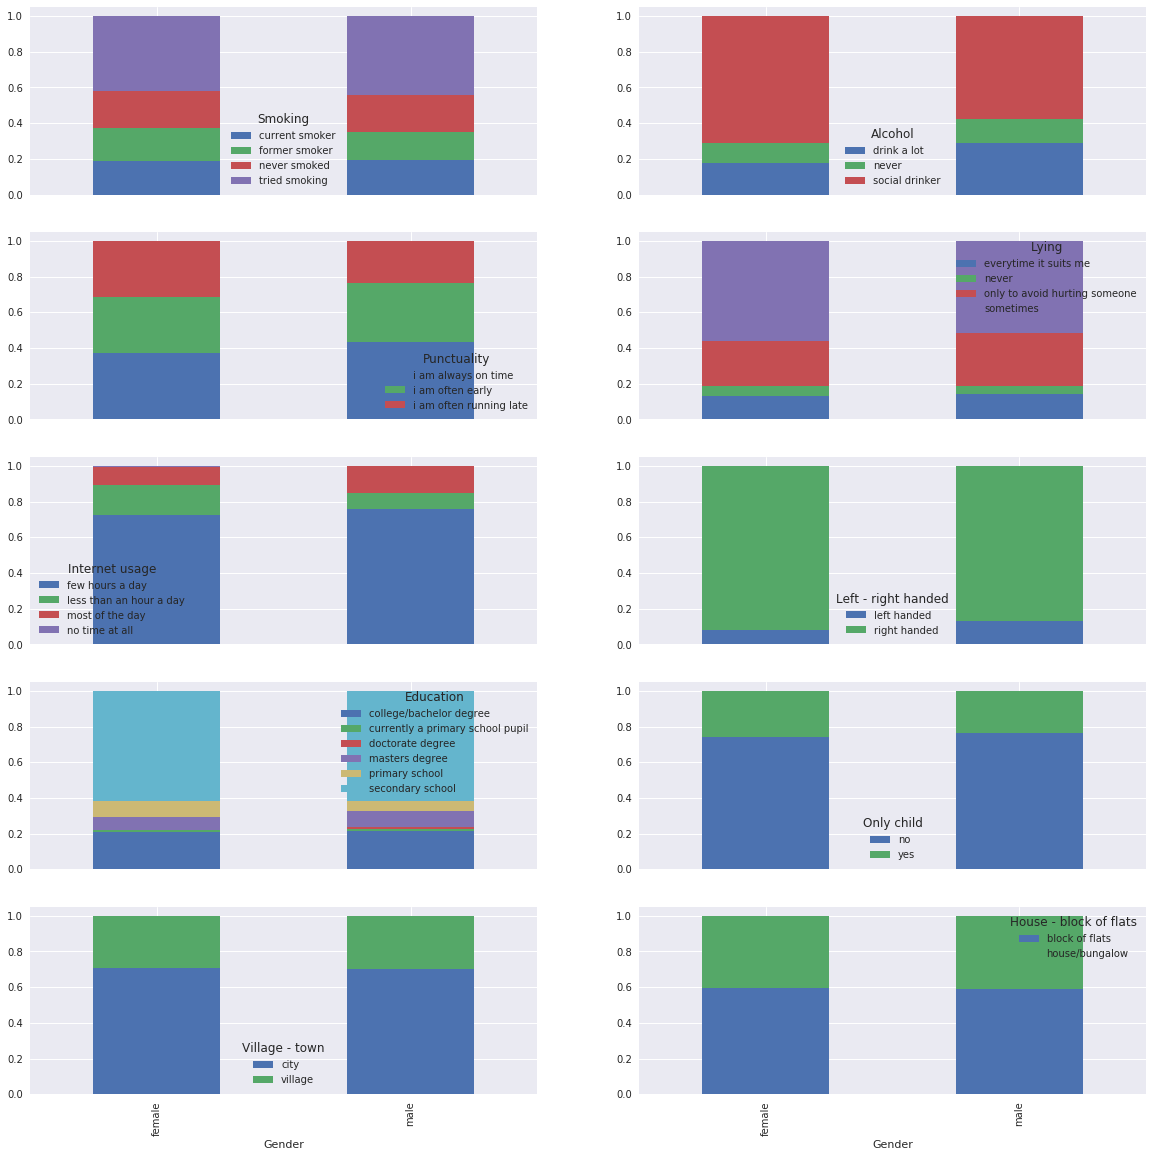

In [40]:
features_cats = [col for col in young.columns if young[col].dtype=='object']
features_cats.remove(var_of_interest)
fig, ax = plt.subplots(nrows = 5, ncols = 2,figsize=(20,20), sharex=True)
start = 0
for j in range(5):
    for i in range(2):
        tab = pd.crosstab(young[var_of_interest], young[features_cats[start]])
        tab_prop = tab.div(tab.sum(1).astype(float), axis=0)
        tab_prop.plot(kind="bar", stacked=True, ax=ax[j,i] )
        start += 1

#### En este caso no existen grandes diferencias entre los géneros, excepto en el consumo de alcohol, ya que los hombres beben un poco más que las mujeres.

## Multicolinealidad

#### A continuación se realiza un análisis para poder observar qué características están correlacionadas en el conjunto de datos.

In [41]:
corr = young.dropna().corr()
#display(corr) #Tabla completa
os = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
display(os.head(10))
display(os.tail(10))

Height               Weight              0.729430
Biology              Medicine            0.719063
Fantasy/Fairy tales  Animated            0.709269
Biology              Chemistry           0.679350
Shopping             Shopping centres    0.658652
Mathematics          Physics             0.611750
Chemistry            Medicine            0.602294
Classical music      Opera               0.599296
Art exhibitions      Theatre             0.567726
Snakes               Rats                0.565762
dtype: float64

Reading            Cars                -0.323793
Shopping           Height              -0.330223
Romantic           Height              -0.335372
Loneliness         Number of friends   -0.349509
Changing the past  Happiness in life   -0.350884
Loneliness         Energy levels       -0.358408
Dangerous dogs     Small - big dogs    -0.385346
Life struggles     Weight              -0.392175
                   Height              -0.409165
Loneliness         Happiness in life   -0.467836
dtype: float64

#### Las características más correlacionadas son Altura y Peso, algo que resulta muy lógico y esperable. Por otra parte la soledad y la felicidad en la vida tienen una mínima correlación negativa, nuevamente algo muy esperable.